In [1]:
# read file
with open("../cleaning/clean_data.csv", encoding="utf8") as file:
	data = file.read().split("\n")

header = data[0]
students = data[1:]

total_student = len(students)

# split header
header = header.split(",")
subjects = header[5:]

# split each student in list
for i in range(len(students)):
	students[i] = students[i].split(",")

# remove last student (empty student)
students.pop()

['']

In [2]:
# Get number of student per age group
# 2003 2002 2001 2000 ... 1994 <= 1993
# 17 18 19 ... 26 >=27
num_of_student_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]
average_of_student_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]

for s in students:
	age = 2020 - int(s[4])
	if age >= 27:
		age = 27
	num_of_student_per_age_group[age - 17] += 1

	sum_score = 0 # Tổng điểm
	count_score = 0 # Số môn thi
	for i in range(11):
		if s[i+5] != "-1":
			count_score += 1
			sum_score += float(s[i+5])

	average = sum_score/count_score
	average_of_student_per_age_group[age-17] += average

In [3]:
for i in range(len(average_of_student_per_age_group)):
	average_of_student_per_age_group[i] = average_of_student_per_age_group[i]/num_of_student_per_age_group[i]

for i in range(len(average_of_student_per_age_group)):
	average_of_student_per_age_group[i] = average_of_student_per_age_group[i] * 7000

print(num_of_student_per_age_group)
print(average_of_student_per_age_group)

[2, 66327, 4463, 1396, 767, 384, 300, 223, 177, 109, 296]
[55674.99999999999, 46142.82397816897, 44245.86389098245, 43956.57103629422, 42182.226857887865, 41931.009114583336, 41655.41388888891, 40588.5754857997, 42488.064971751395, 41378.675840978576, 43154.051801801805]


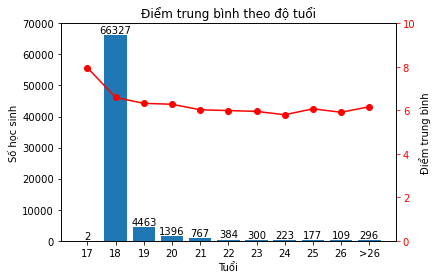

In [9]:
# Draw barchart
# https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
import matplotlib.pyplot as plt
import numpy as np

age_label = [17,18,19,20,21,22,23,24,25,26,">26"]
x = np.arange(11)
y = np.arange(11)

fig, axis = plt.subplots()
plt.bar(x, num_of_student_per_age_group)
plt.plot(x, average_of_student_per_age_group, color='red', marker='o')

# for index in range(len(x)):
#   axis.text(x[index], y[index], y[index], size=12)
# set limit 
axis.set_ylim(0,70000)

# label for column x
plt.xticks(x, age_label)

axis.set_ylabel('Số học sinh')
axis.set_xlabel("Tuổi")

# right side ticks
ax2 = axis.twinx()
ax2.tick_params('y', colors='r')
ax2.set_ylabel("Điểm trung bình")
ax2.set_ylim(0,10)

rects = axis.patches
# Label for barchart
# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
labels = [2, 66327, 4463, 1396, 767, 384, 300, 223, 177, 109, 296]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width() / 2, height + 2, label,
            ha='center', va='bottom')

plt.title('Điểm trung bình theo độ tuổi')

plt.show()